In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

housing = fetch_california_housing(as_frame=True)
df = housing.frame
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:

print("DataFrame Info:")
print(df.info())

print("\nStatistical Summary:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None

Statistical Summary:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.0000

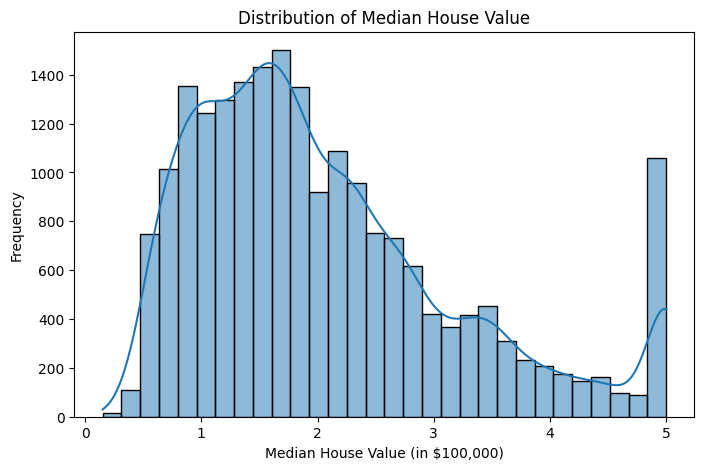

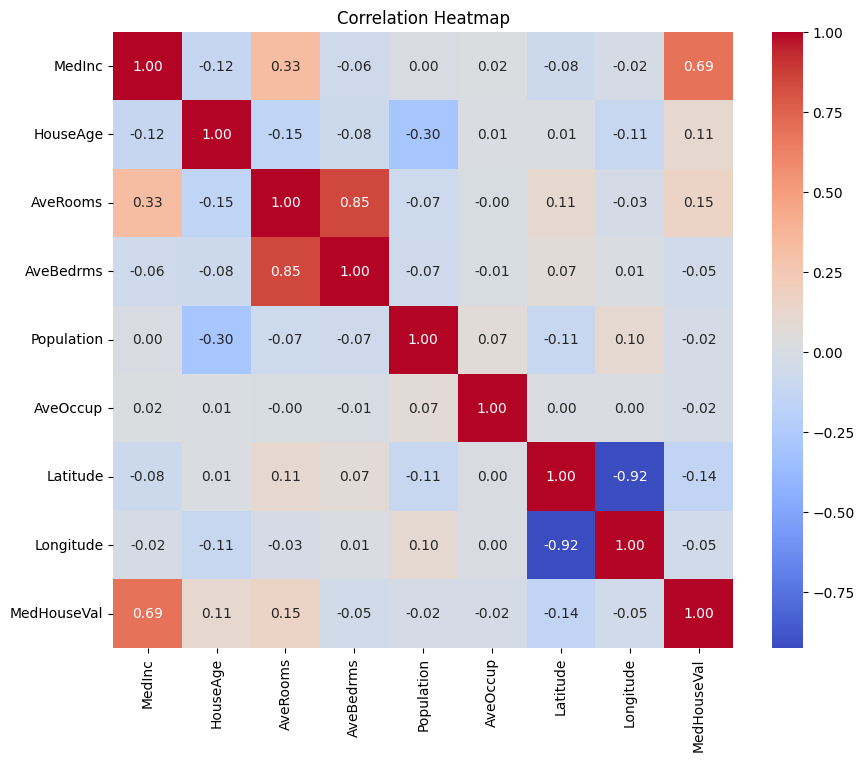

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of target variable
plt.figure(figsize=(8, 5))
sns.histplot(df['MedHouseVal'], kde=True, bins=30)
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value (in $100,000)')
plt.ylabel('Frequency')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_pred = rf_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"Random Forest MSE: {mse:.2f}")
print(f"Random Forest RMSE: {rmse:.2f}")
print(f"Random Forest R² Score: {r2:.2f}")


Random Forest MSE: 0.26
Random Forest RMSE: 0.51
Random Forest R² Score: 0.81


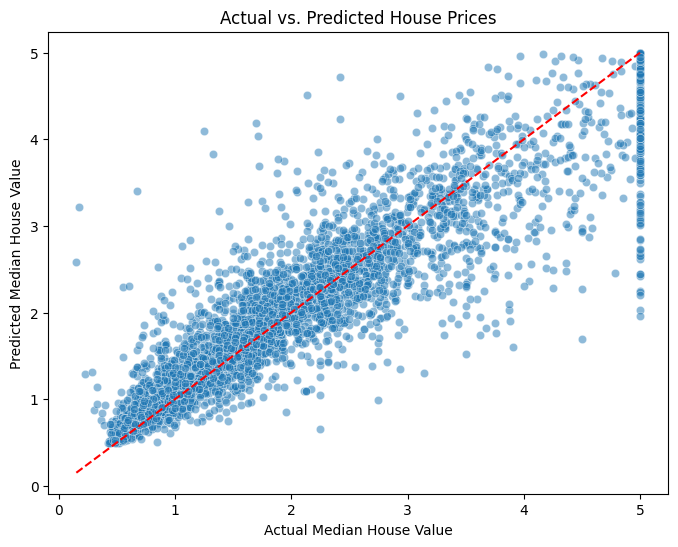

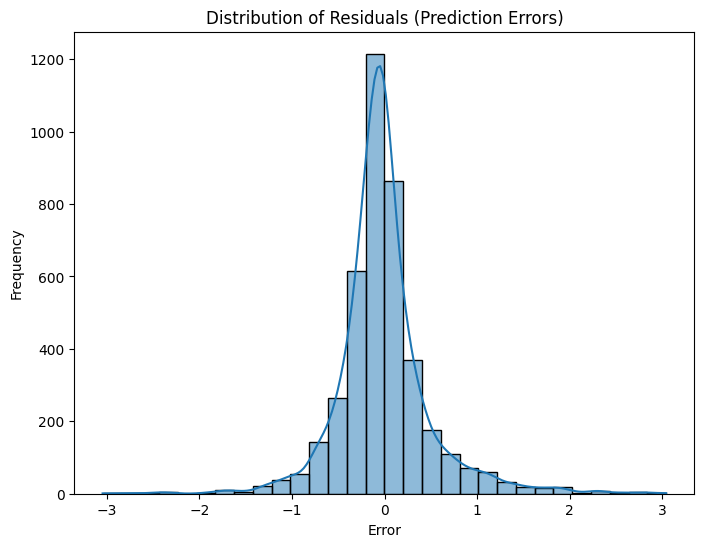

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # ideal line
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs. Predicted House Prices")
plt.show()

residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Distribution of Residuals (Prediction Errors)")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.show()

In [ ]:
import numpy as np
import joblib

def predict_price(medinc, houseage, averooms, avebedrms, population, aveoccup, latitude, longitude):
    model = joblib.load('house_price_model_rf.pkl')
    scaler = joblib.load('scaler.pkl')

    input_data = np.array([[medinc, houseage, averooms, avebedrms, population, aveoccup, latitude, longitude]])
    input_scaled = scaler.transform(input_data)

    prediction = model.predict(input_scaled)[0]
    return f"🏠 Predicted Median House Price: ${prediction * 100000:,.2f}"


In [ ]:
pip install gradio matplotlib seaborn scikit-learn joblib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.3/323.3 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 105.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.5 MB/s eta 0:00:00


In [ ]:
import joblib


joblib.dump(rf_model, 'house_price_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [ ]:
import gradio as gr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

model = joblib.load("house_price_model.pkl")
scaler = joblib.load("scaler.pkl")
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing(as_frame=True).frame


def predict_price(MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude):
    input_data = np.array([[MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude]])
    input_scaled = scaler.transform(input_data)
    prediction = model.predict(input_scaled)[0]
    return f"🏠 Predicted Median House Value: ${prediction * 100000:.2f}"


def show_eda():
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))


    sns.histplot(data['MedHouseVal'], bins=30, kde=True, ax=axes[0], color="skyblue")
    axes[0].set_title("Distribution of Median House Value")
    axes[0].set_xlabel("Median Value ($100,000)")
    corr = data.corr()
    sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[1])
    axes[1].set_title("Correlation Heatmap")

    plt.tight_layout()
    return fig

with gr.Blocks(theme=gr.themes.Soft()) as demo:
    gr.Markdown("# 🏡 California House Price Predictor")
    gr.Markdown("Predict house prices using ML & explore insights into the California Housing Dataset.")

    with gr.Tabs():
        with gr.TabItem("🏠 Predict Price"):
            gr.Markdown("### Enter housing features below:")

            with gr.Row():
                with gr.Column():
                    medinc = gr.Number(label="Median Income (MedInc)", value=3.5)
                    houseage = gr.Number(label="House Age", value=25)
                    averooms = gr.Number(label="Average Rooms (AveRooms)", value=5)
                    avebedrms = gr.Number(label="Average Bedrooms (AveBedrms)", value=1)

                with gr.Column():
                    population = gr.Number(label="Population", value=1000)
                    aveoccup = gr.Number(label="Average Occupants (AveOccup)", value=3)
                    latitude = gr.Number(label="Latitude", value=34)
                    longitude = gr.Number(label="Longitude", value=-118)

            predict_btn = gr.Button("🔍 Predict Price")
            output = gr.Textbox(label="Prediction", interactive=False)

            predict_btn.click(
                fn=predict_price,
                inputs=[medinc, houseage, averooms, avebedrms, population, aveoccup, latitude, longitude],
                outputs=output
            )

        with gr.TabItem("📊 EDA"):
            gr.Markdown("### Explore the California Housing Dataset")
            eda_btn = gr.Button("📈 Show Visualizations")
            eda_plot = gr.Plot()

            eda_btn.click(fn=show_eda, inputs=[], outputs=eda_plot)

demo.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://0e95de76b9f643cf5f.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
